In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Finger Classification Data

On April 13th 2020 finger data classified for each of the 5 fingers was gathered on the right hand. 
Roughly 100 samples were gathered for each finger.  
The process of gathering the data was filmed. These recordings can be found [here.](/home/peter/Documents/Dissertation/Media/PickingFingers)

Two datasets were gathered, one where my wrist was resting on a book and one where my hand was in the air. 
The book data was recoded first, then after a ~10 minute break the arm data was recorded. 

The source code used to gather this data and the data itself can be found in [this](https://github.com/PerlinWarp/myo-raw/commit/53fafc1bae404f045704e76cf6f7ea0e9aaaac2a) commit.

In [3]:
path = "../../data/FingerClassification/"
air_path = path+"fingers100air/"
book_path = path+"fingers100book/"

In [37]:
rest  = np.fromfile(book_path+"vals0.dat", dtype=np.uint16).reshape((-1, 8))
thumb  = np.fromfile(book_path+"vals1.dat", dtype=np.uint16).reshape((-1, 8))
index  = np.fromfile(book_path+"vals2.dat", dtype=np.uint16).reshape((-1, 8))
middle = np.fromfile(book_path+"vals3.dat", dtype=np.uint16).reshape((-1, 8))
ring   = np.fromfile(book_path+"vals4.dat", dtype=np.uint16).reshape((-1, 8))
pinky  = np.fromfile(book_path+"vals5.dat", dtype=np.uint16).reshape((-1, 8))
air_data = [rest, thumb, index, middle, ring, pinky]
label_cols = ['rest', 'thumb', 'index', 'middle', 'ring', 'pinky']

In [41]:
for i in range(len(air_data)):
    print(label_cols[i], air_data[i].shape[0])

rest 103
thumb 108
index 101
middle 103
ring 97
pinky 101


In [5]:
air_df = pd.DataFrame(np.vstack(air_data))

In [42]:
air_df.shape

(613, 9)

## Adding a labels column

In [6]:
a = rest
b = np.hstack((a, np.zeros((a.shape[0], 1), dtype=a.dtype)))

In [7]:
labelled_air_data = []
for i in range(len(air_data)):
    a = air_data[i]
    labels_col = np.ones((a.shape[0], 1), dtype=a.dtype)*i
    b = np.hstack((a, labels_col))
    labelled_air_data.append(b)

In [8]:
cols = ["Ch1","Ch2","Ch3","Ch4","Ch5", "Ch6", "Ch7", "Ch8", "Finger"]
air_df = pd.DataFrame(np.vstack(labelled_air_data), columns=cols)

In [9]:
#air_df.to_csv('air_df.csv',index=False)

In [10]:
air_df.var()

Ch1        1392.905469
Ch2         361.776280
Ch3       18578.691105
Ch4        1305.301149
Ch5         144.123698
Ch6        3421.838584
Ch7        7548.912799
Ch8        1917.288413
Finger        2.919223
dtype: float64

[Text(0.5, 1.0, 'sEMG and Finger corrolations')]

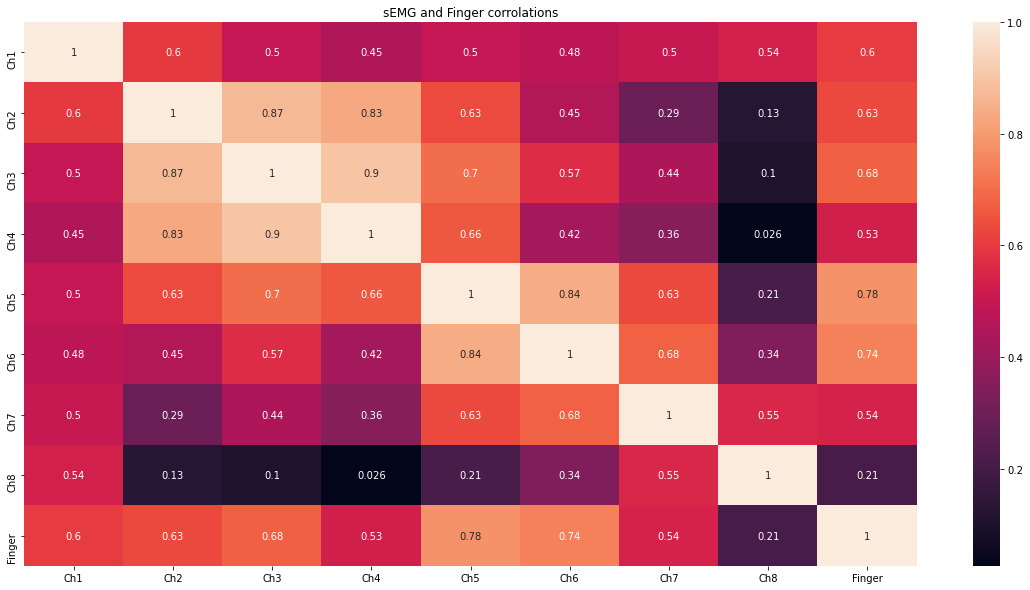

In [11]:
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(air_df.corr(), annot=True).set(title="sEMG and Finger corrolations")

In [12]:
# Replacing numerical fingernames with str
finger_names = ["rest", "thumb", "index", "middle", "ring", "pinky"]
air_df['Finger'] = air_df['Finger'].apply(lambda x: finger_names[x])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52c687e910>,
      dtype=object)

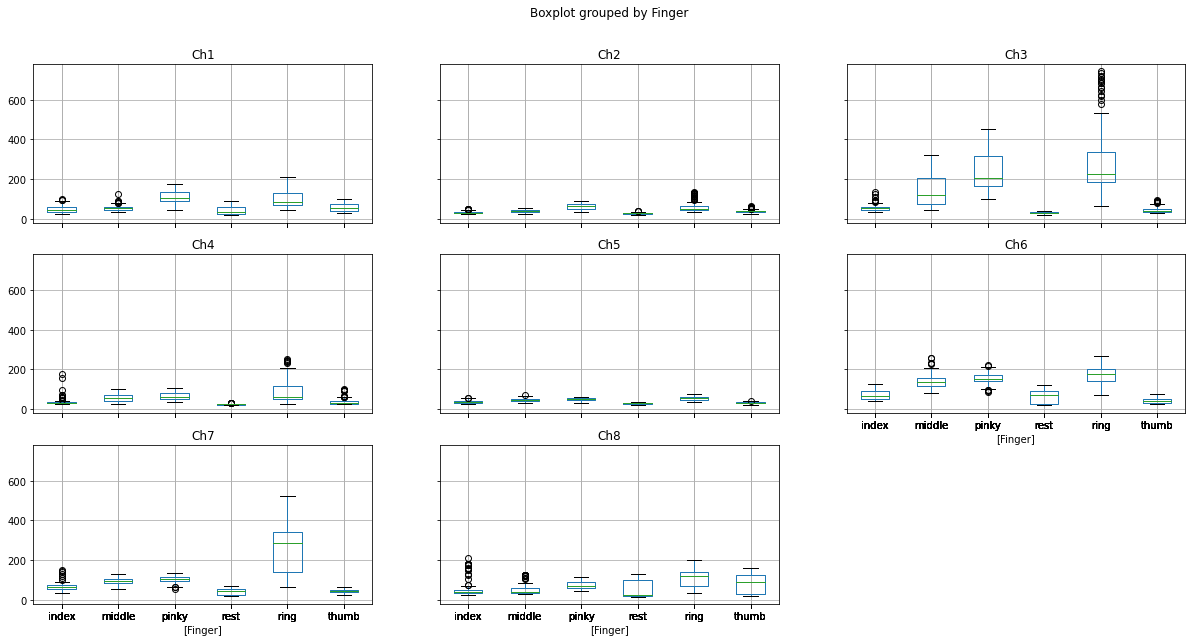

In [13]:
air_df.boxplot(by='Finger')

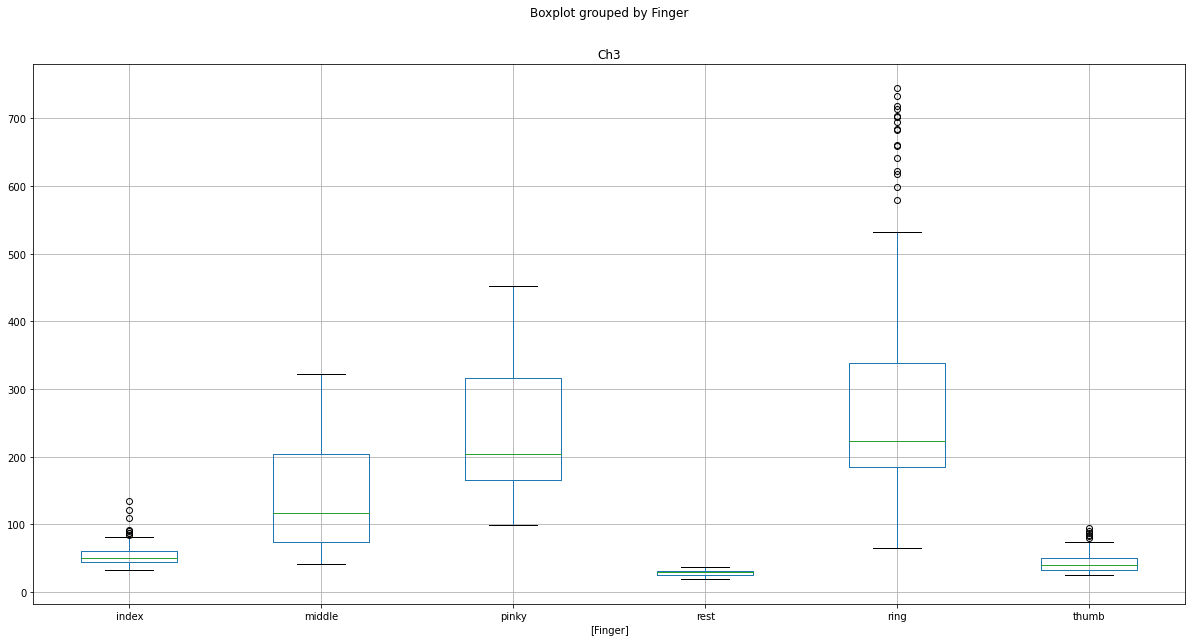

In [14]:
air_df[['Ch3', 'Finger']].boxplot(by='Finger')

In [15]:
air_df.groupby('Finger').mean()

,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8
Finger,,,,,,,,
index,48.673267,30.178218,55.079208,36.455446,36.970297,72.405941,66.306931,57.574257
middle,53.436893,37.368932,137.922330,56.126214,47.514563,142.592233,92.660194,51.834951
pinky,107.425743,61.970297,236.811881,66.118812,51.099010,154.663366,103.267327,73.227723
rest,42.029126,27.446602,27.932039,24.388350,28.912621,67.456311,41.825243,51.689320
ring,100.855670,59.350515,301.752577,92.546392,55.041237,170.505155,258.103093,109.659794
thumb,56.277778,36.638889,43.870370,36.870370,31.574074,42.296296,43.120370,78.879630


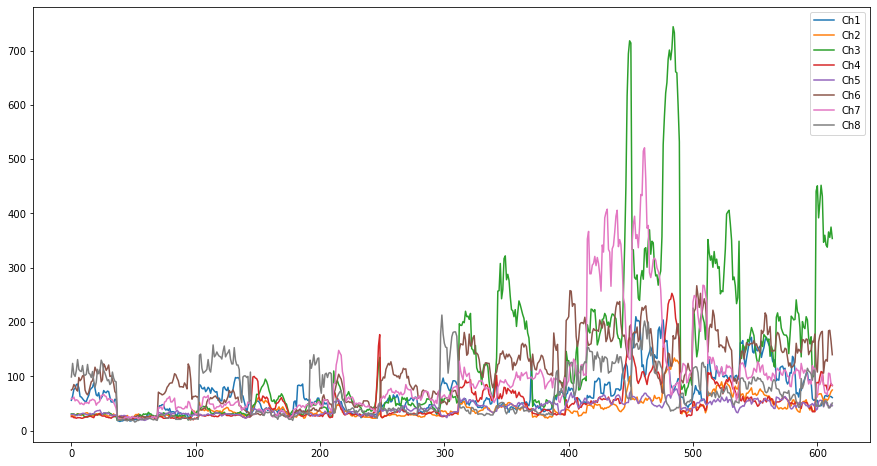

In [16]:
import matplotlib

matplotlib.rc('figure', figsize=(15, 8))

air_df.plot(figsize=(15, 8))

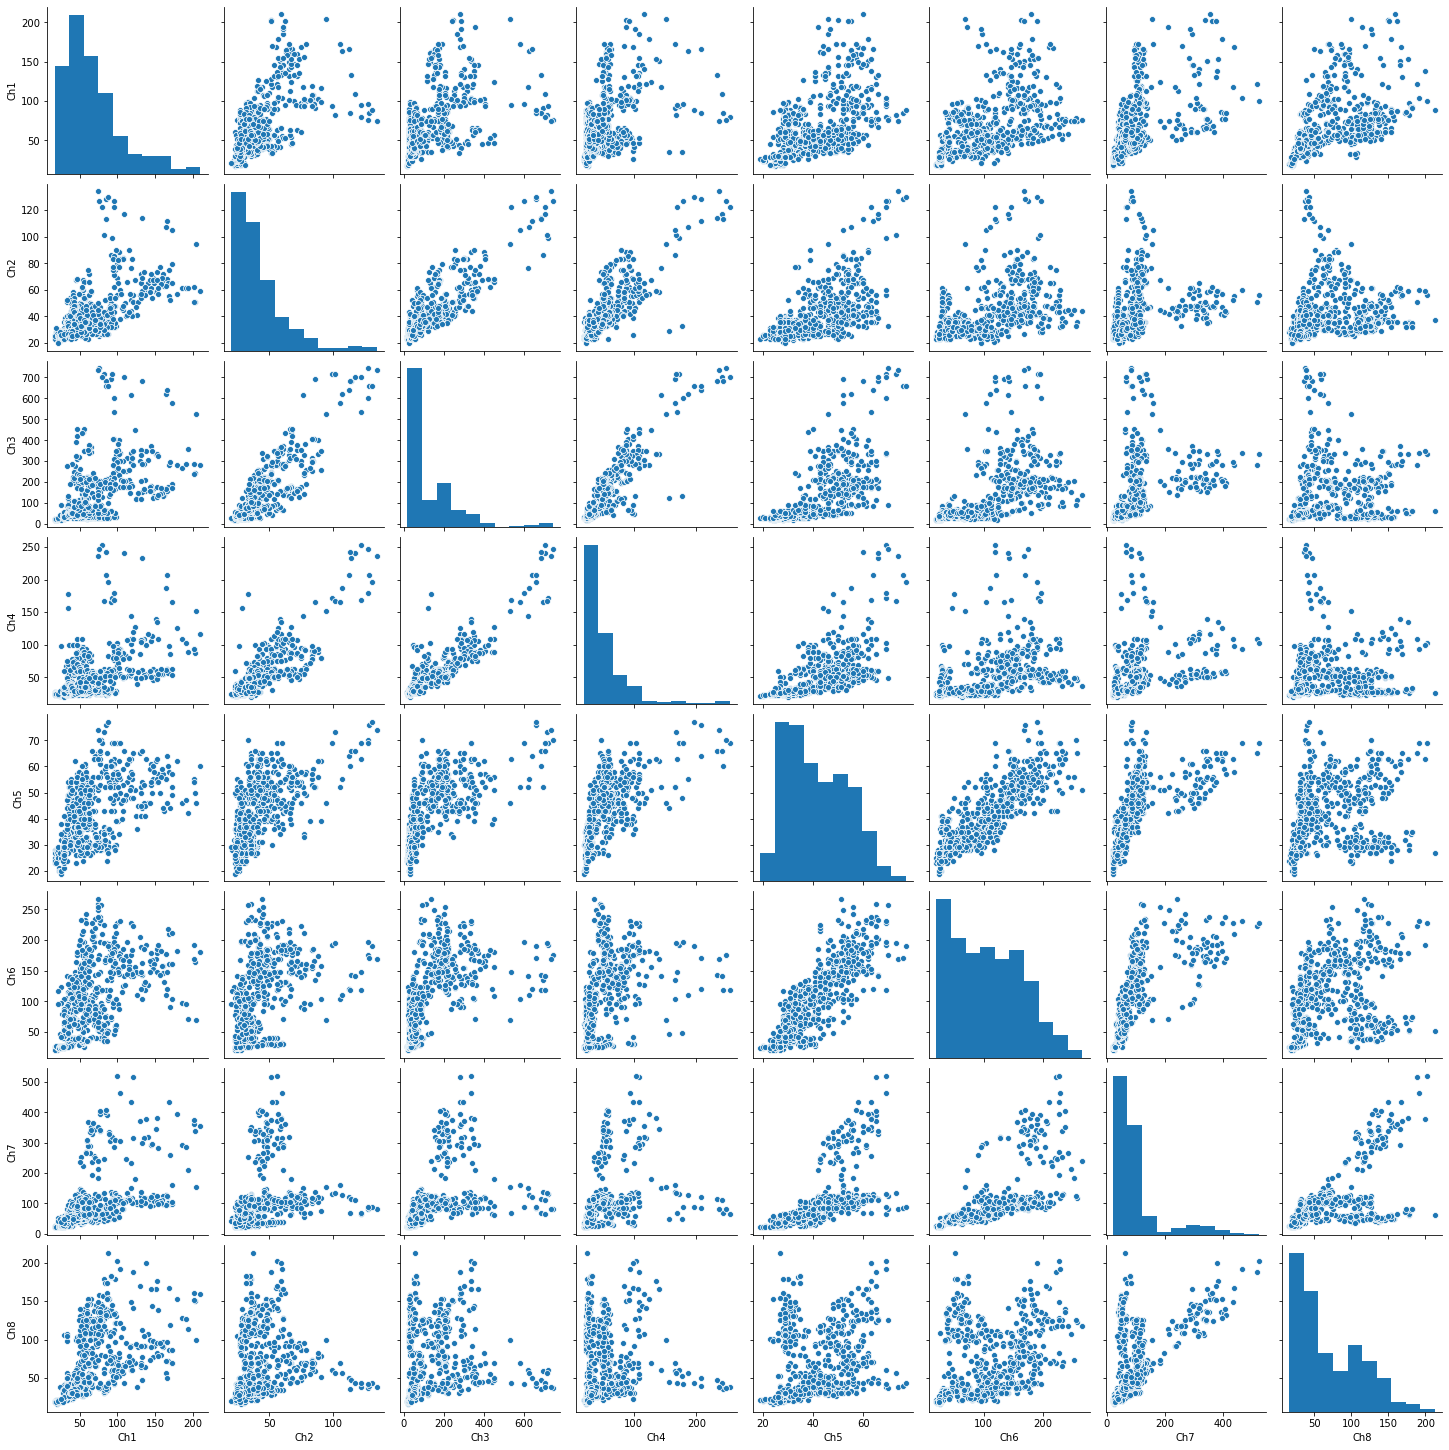

In [17]:
sns.pairplot(air_df)

## PCA

In [18]:
from sklearn import decomposition

X = air_df.drop(['Finger'],1).values
X.shape

(613, 8)

In [19]:
pca = decomposition.PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)

[6.96677954e-01 1.97451308e-01 4.38564456e-02 3.72797149e-02
 1.63281646e-02 6.18305357e-03 1.60339558e-03 6.19962743e-04]


In [20]:
X.shape

(613, 8)

In [21]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
Xp = pca.transform(X)

print(pca.explained_variance_ratio_)

[0.69667795 0.19745131]


In [22]:
finger_names

['rest', 'thumb', 'index', 'middle', 'ring', 'pinky']

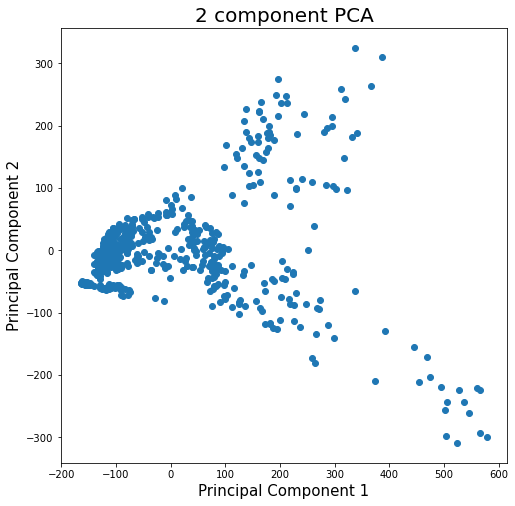

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(Xp[:,0], Xp[:,1])

In [24]:
plt.cm.nipy_spectral(5)

(0.18301960784313726, 0.0, 0.20913725490196078, 1.0)

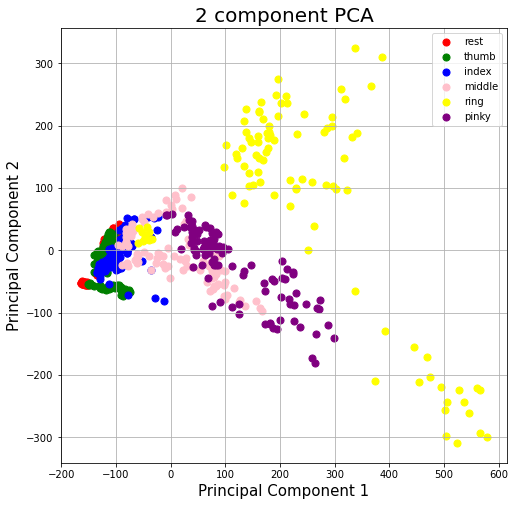

In [25]:
principalDf = pd.DataFrame(data = Xp
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, air_df[['Finger']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = finger_names
colors = ['red', 'green', 'blue', 'pink', 'yellow', 'purple']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Finger'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

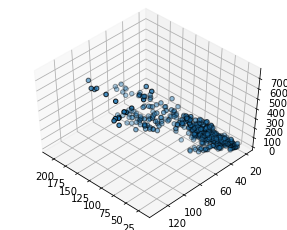

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

y = air_df.Finger

ax.scatter(X[:, 0], X[:, 1], X[:, 2], cmap=plt.cm.nipy_spectral,
           edgecolor='k')

## LDA

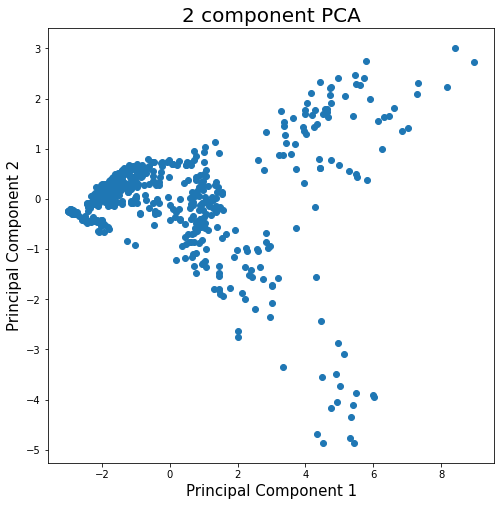

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = air_df.drop(['Finger'], 1)
y = air_df.Finger

clf = LinearDiscriminantAnalysis()
clf.fit(Xp, y)

Xl = clf.transform(Xp)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(Xl[:,0], Xl[:,1])

# XGBoost

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = air_df.drop(['Finger'],1).values
Y = air_df.Finger

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

y_pred
#predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.57%


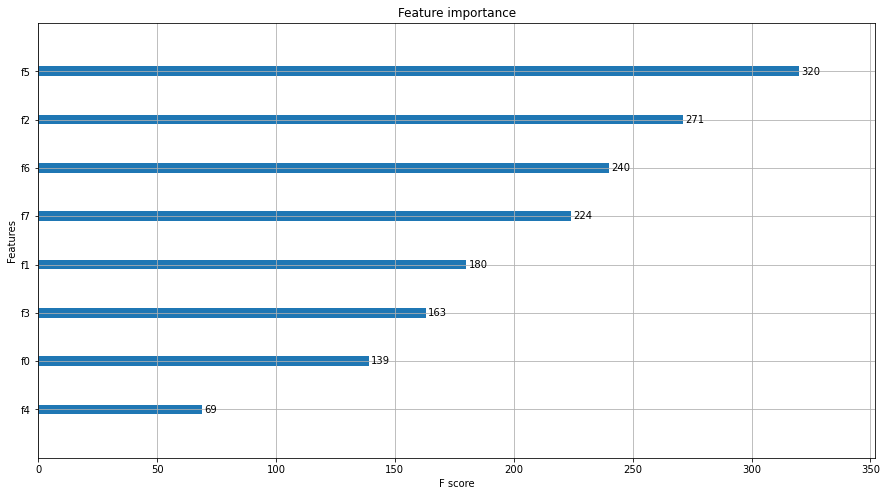

In [29]:
from xgboost import plot_importance

# plot
plot_importance(model)

In [30]:
finger_names

['rest', 'thumb', 'index', 'middle', 'ring', 'pinky']

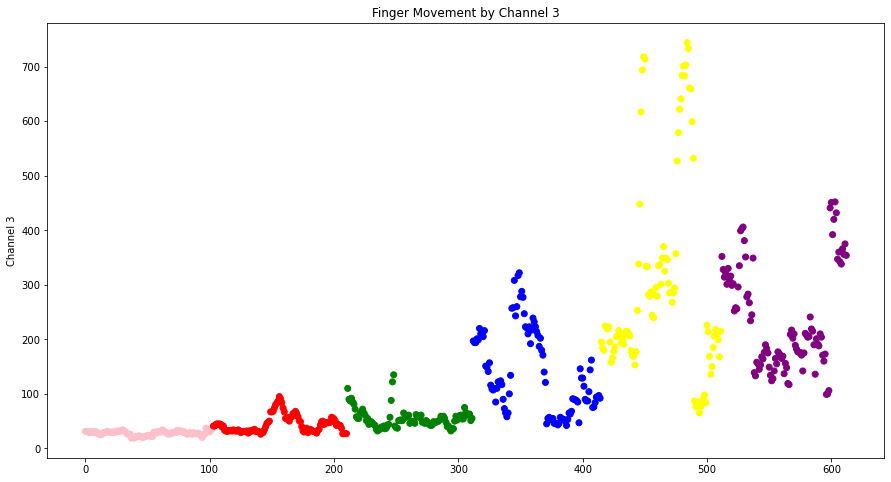

In [31]:
fig, ax = plt.subplots()

colors = {'rest':'pink', 'thumb':'red', 'index':'green', 'middle':'blue', 'ring':'yellow', 'pinky':'purple'}
ax.scatter(air_df.index, air_df['Ch3'], c=air_df['Finger'].map(colors))

ax.set_title("Finger Movement by Channel 3")
ax.set_ylabel("Channel 3")
plt.show()

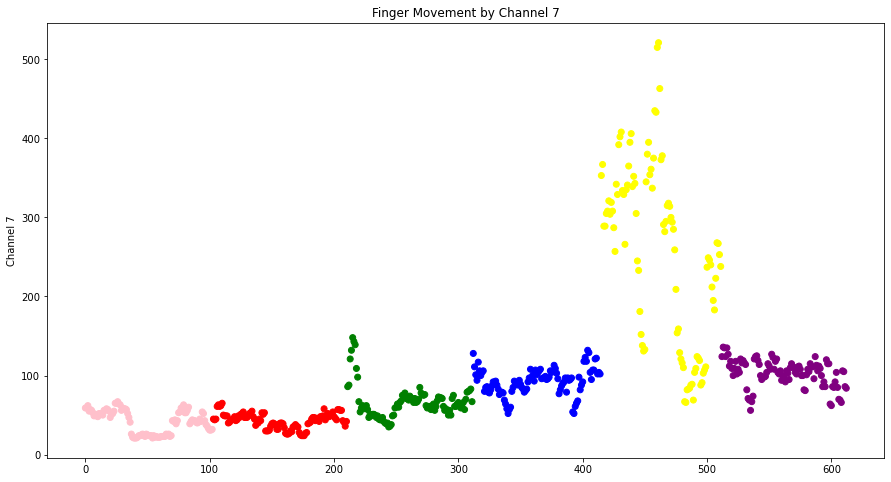

In [32]:
fig, ax = plt.subplots()

colors = {'rest':'pink', 'thumb':'red', 'index':'green', 'middle':'blue', 'ring':'yellow', 'pinky':'purple'}
ax.scatter(air_df.index, air_df['Ch7'], c=air_df['Finger'].map(colors))

ax.set_title("Finger Movement by Channel 7")
ax.set_ylabel("Channel 7")
plt.show()

No handles with labels found to put in legend.


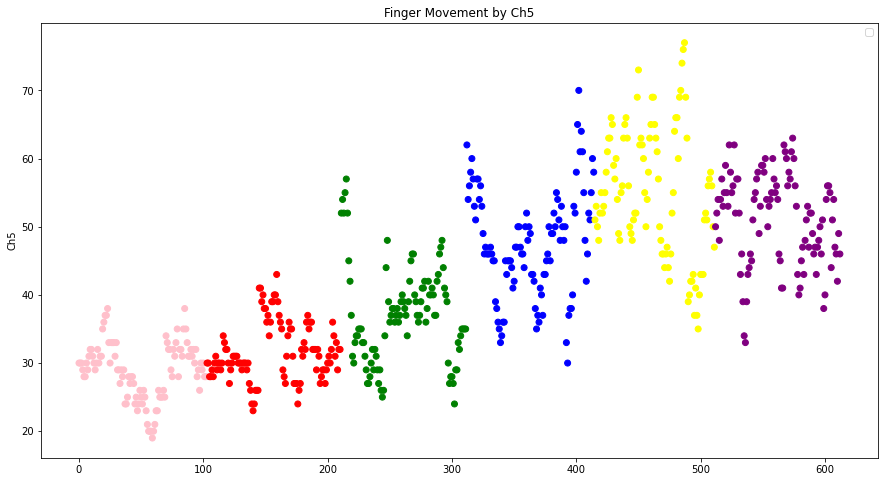

In [33]:
ch = 5
channel = "Ch" + str(ch)
fig, ax = plt.subplots()

colors = {'rest':'pink', 'thumb':'red', 'index':'green', 'middle':'blue', 'ring':'yellow', 'pinky':'purple'}
ax.scatter(air_df.index, air_df[channel], c=air_df['Finger'].map(colors))
ax.legend()
ax.set_title("Finger Movement by " + channel)
ax.set_ylabel(channel)
plt.show()

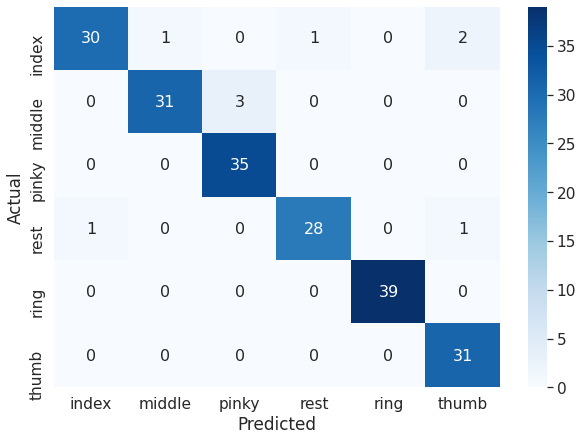

In [34]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size